<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sandford+-2020,-Section-3:-Methods" data-toc-modified-id="Sandford+-2020,-Section-3:-Methods-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sandford+ 2020, Section 3: Methods</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Plotting-Configs" data-toc-modified-id="Plotting-Configs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting Configs</a></span></li><li><span><a href="#Figure-2:-HR-&amp;-Kiel-Diagrams" data-toc-modified-id="Figure-2:-HR-&amp;-Kiel-Diagrams-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Figure 2: HR &amp; Kiel Diagrams</a></span></li></ul></li></ul></div>

# Sandford+ 2020, Section 3: Methods
## Imports 

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Plotting Configs

In [2]:
output_dir = './figures/'

mpl.rc('axes', grid=True, lw=2)
mpl.rc('ytick', direction='in', labelsize=14)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('xtick', direction='in', labelsize=14)
mpl.rc('xtick.major', size=5, width=1)
mpl.rc('ytick', direction='in', labelsize=14)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('grid', lw=0)
mpl.rc('figure', dpi=300)

## Figure 2: HR & Kiel Diagrams

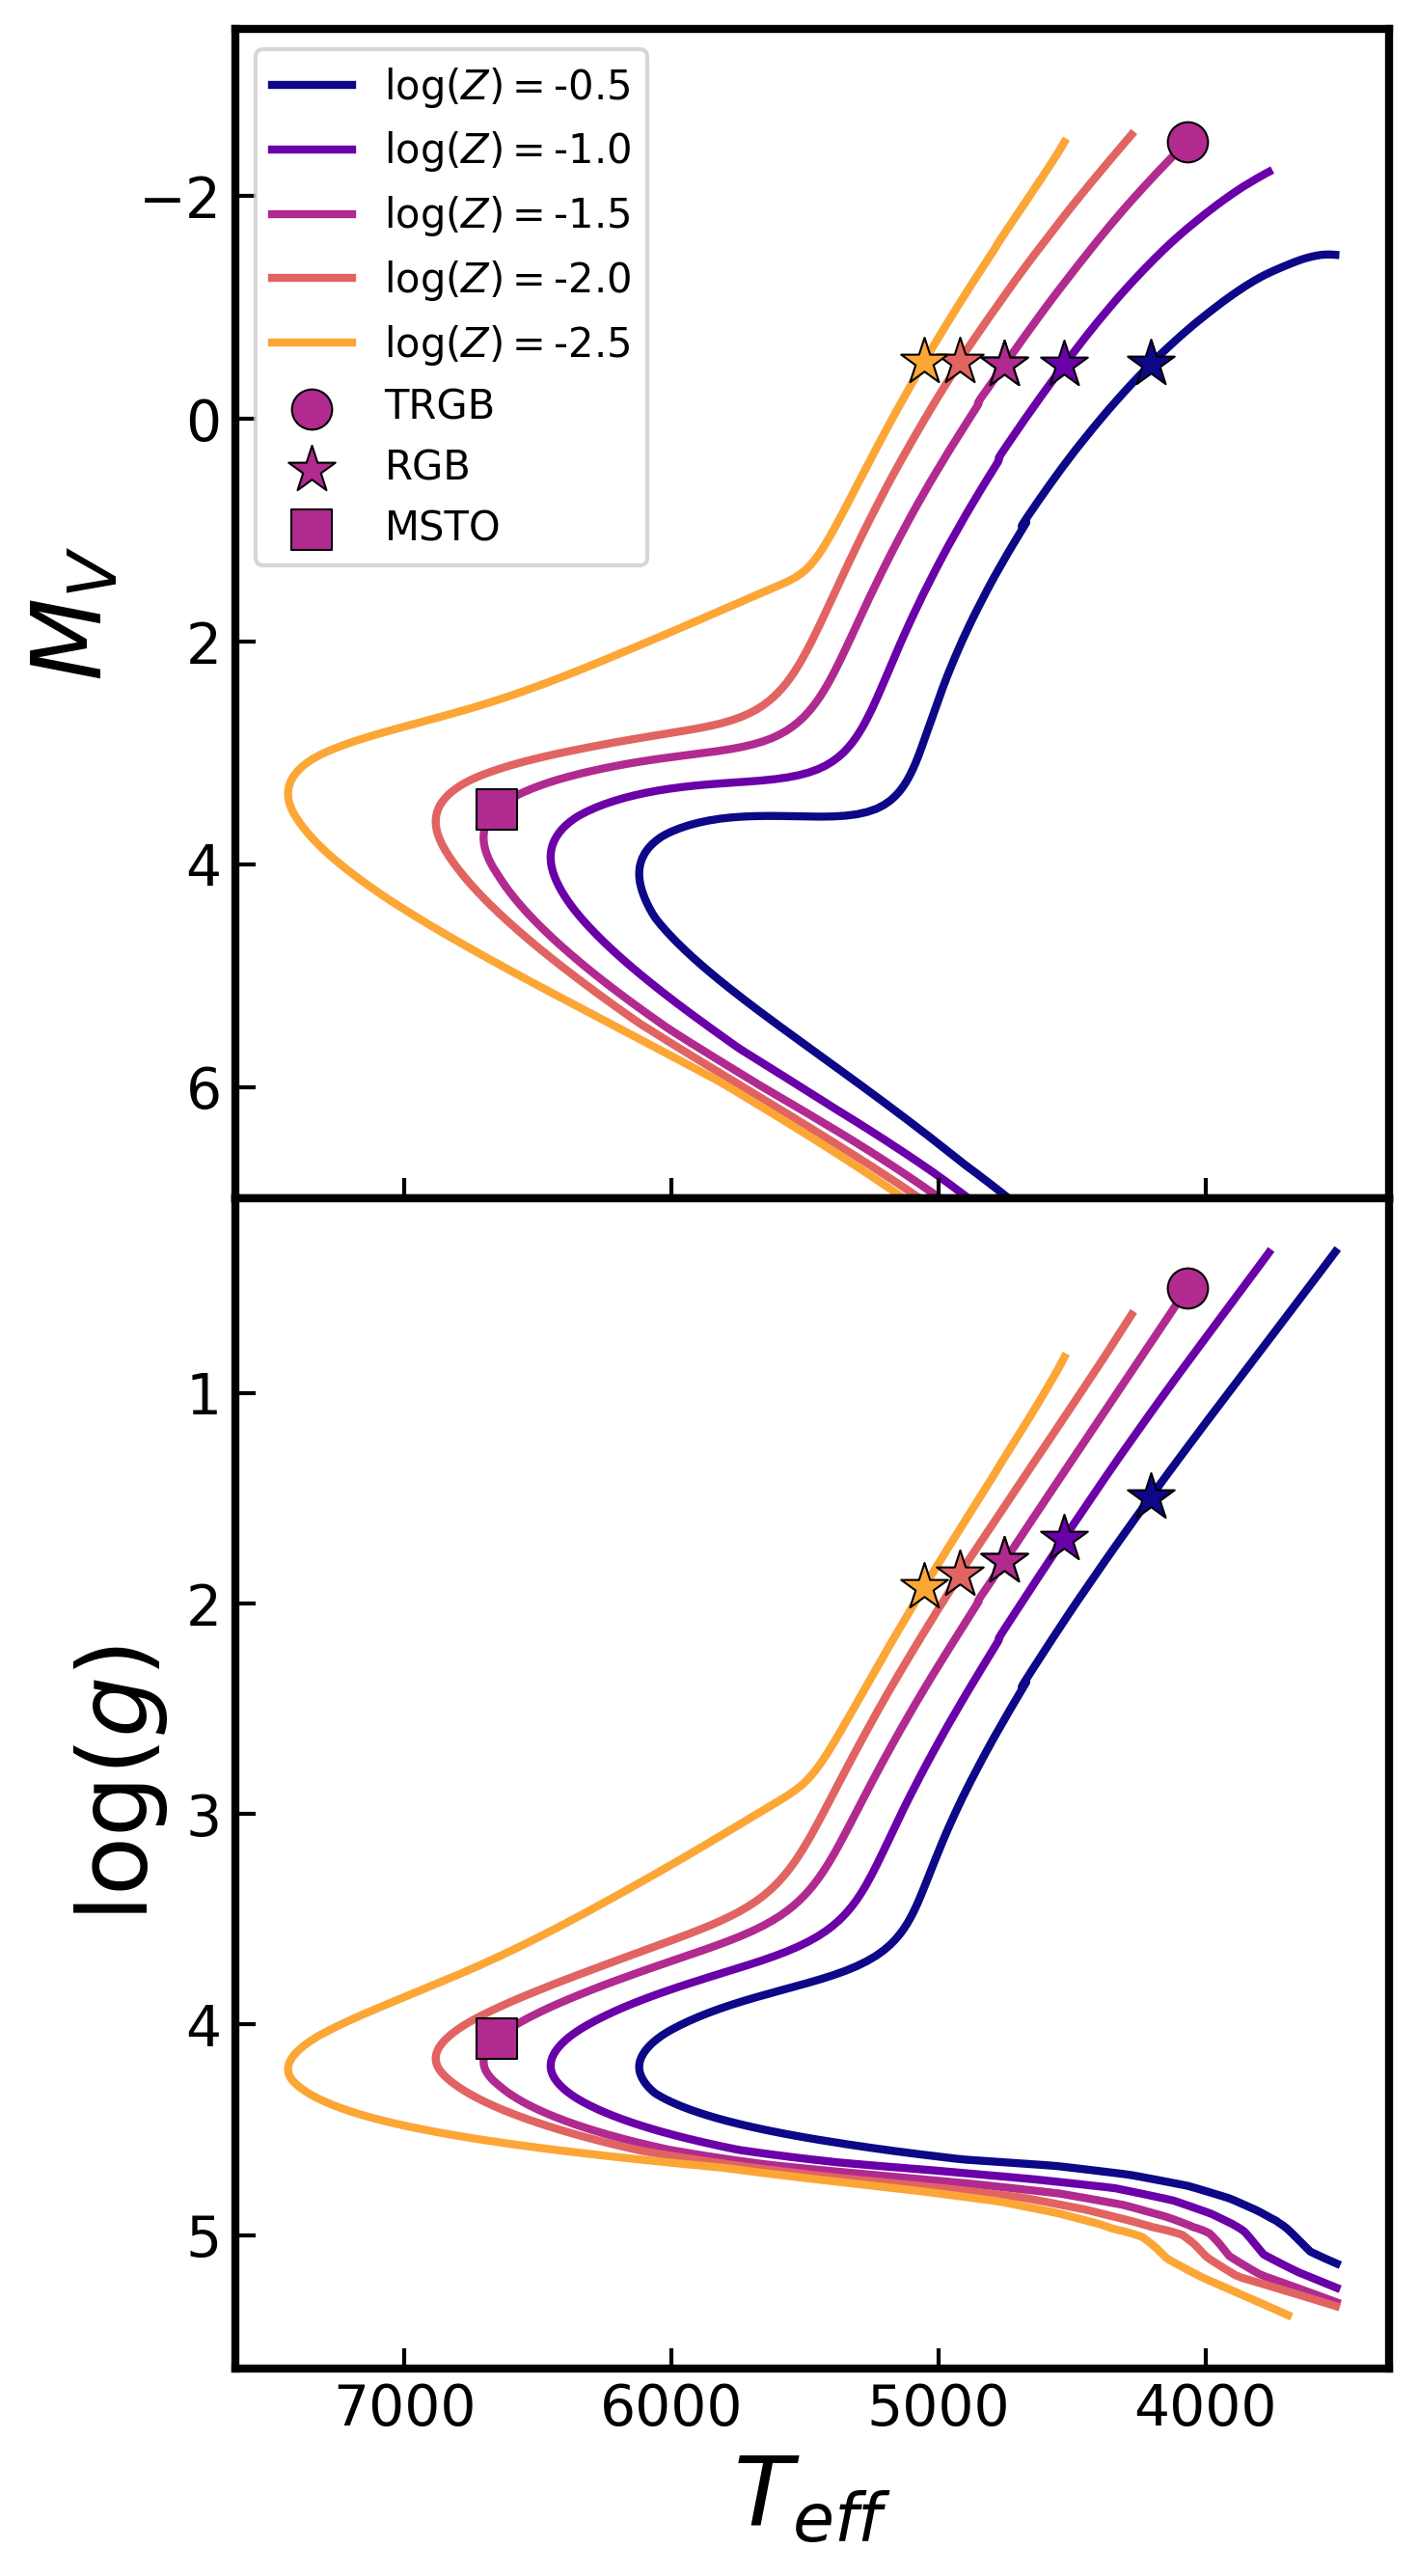

In [3]:
log_age = 10  # Select 10 Gyr old isochrones
metallicities = [-0.5, -1.0, -1.5, -2.0, -2.5]  # Select isochrone metallicities
c = plt.cm.get_cmap('plasma', len(metallicities) + 1)

# Initialize figure
fig = plt.figure(figsize=(5, 9))
gs = GridSpec(2, 1, hspace=0)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])

# Loop through metallicities
for i, feh in enumerate(metallicities):
    iso = pd.read_hdf('./isochrones.h5', f'{feh:1.1f}')  # Load isochrone
    iso = iso[(iso['log10_isochrone_age_yr'] == log_age) & (10**iso['log_Teff'] >= 3500)]  # Select on age and effective temperature
    rgb_idx = (np.abs(iso['Bessell_V'] + 0.5)).idxmin()  # Find RGB star w/ M_V = -0.5 
    # Plot Isochrones
    ax1.plot(10**iso['log_Teff'], iso['Bessell_V'], c=c(i), lw=2, zorder=-1, label=r'$\log(Z)=$'+f'{feh:1.1f}')
    ax2.plot(10**iso['log_Teff'], iso['log_g'], c=c(i), lw=2, zorder=-1, label=r'$\log(Z)=$'+f'{feh:1.1f}')
    # Plot Reference Stars
    ax1.scatter(10**iso['log_Teff'][rgb_idx], iso['Bessell_V'][rgb_idx], 
                marker='*', c=[c(i)], edgecolor='k', lw=0.5, s=150)
    ax2.scatter(10**iso['log_Teff'][rgb_idx], iso['log_g'][rgb_idx], 
                marker='*', c=[c(i)], edgecolor='k', lw=0.5, s=150)
    if feh == -1.5:
        trgb_idx = (np.abs(iso['Bessell_V'] + 2.5)).idxmin() # Find TRGB star w/ M_V = -2.5
        msto_idx = (np.abs(iso['Bessell_V'] - 3.5)).idxmin() # Find MSTO star w/ M_V = +3.5
        ax1.scatter(10**iso['log_Teff'][trgb_idx], iso['Bessell_V'][trgb_idx], 
                    marker='o', c=[c(2)], edgecolor='k', lw=0.5, s=100, label=f'TRGB')
        ax2.scatter(10**iso['log_Teff'][trgb_idx], iso['log_g'][trgb_idx], 
                    marker='o', c=[c(2)], edgecolor='k', lw=0.5, s=100, label=f'TRGB')
        ax1.scatter(10**iso['log_Teff'][rgb_idx], iso['Bessell_V'][rgb_idx], 
                    marker='*', c=[c(2)], edgecolor='k', lw=0.5, s=150, label=f'RGB')
        ax2.scatter(10**iso['log_Teff'][rgb_idx], iso['log_g'][rgb_idx], 
                    marker='*', c=[c(2)], edgecolor='k', lw=0.5, s=150, label=f'RGB')
        ax1.scatter(10**iso['log_Teff'][msto_idx], iso['Bessell_V'][msto_idx], 
                    marker='s', c=[c(2)], edgecolor='k', lw=0.5, s=100, label=f'MSTO')
        ax2.scatter(10**iso['log_Teff'][msto_idx], iso['log_g'][msto_idx], 
                    marker='s', c=[c(2)], edgecolor='k', lw=0.5, s=100, label=f'MSTO')
# Axes
ax1.set_ylabel(r'$M_V$', size=24)
ax2.set_ylabel(r'$\log(g)$', size=24)
ax2.set_xlabel(r'$T_{eff}$', size=24)
ax1.set_ylim(-3.5, 7)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax2.invert_xaxis()
ax2.invert_yaxis()
# Legend
ax1.legend(fontsize=10, loc='upper left')

plt.tight_layout()
fig.savefig('./figures/hr_kiel.png')
plt.show()